In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns

In [124]:
# importing the csv file

df = pd.read_csv(r'C:\Users\lnong\Desktop\ENLIGHT\aac_shelter_cat_outcome_eng.csv')

In [125]:
# taking only the columns that are of interest 

df_data = df[["age_upon_outcome", "Cat/Kitten (outcome)", "breed",  "coat", "outcome_weekday", "outcome_month", "outcome_year", "outcome_hour", "name", "outcome_type", "sex", "sex_upon_outcome", "Spay/Neuter", "cfa_breed"]]

In [126]:
df_data.head()

,age_upon_outcome,Cat/Kitten (outcome),breed,coat,outcome_weekday,outcome_month,outcome_year,outcome_hour,name,outcome_type,sex,sex_upon_outcome,Spay/Neuter,cfa_breed
0,2 weeks,Kitten,domestic shorthair,orange,Tuesday,7,2014,16,NaN,Transfer,Male,Intact Male,No,False
1,1 month,Kitten,domestic shorthair,blue,Thursday,8,2014,18,Lucy,Adoption,Female,Intact Female,No,False
2,3 months,Kitten,domestic shorthair,white,Sunday,6,2014,17,*Frida,Adoption,Female,Spayed Female,Yes,False
3,1 year,Cat,domestic mediumhair,black,Friday,3,2014,14,Stella Luna,Return to Owner,Female,Spayed Female,Yes,False
4,3 weeks,Kitten,domestic shorthair,black,Thursday,1,2014,19,NaN,Transfer,Male,Intact Male,No,False


In [ ]:
# classify cats by if they have a name or not

catsClean$name = ifelse(nchar(catsClean$name)>0,1,0)

In [7]:
# finding out the different outcomes of cats and how many for each outcome

df_data.groupby("outcome_type")['age_upon_outcome'].count().sort_values(ascending=False)

outcome_type
Transfer           13323
Adoption           12732
Euthanasia          1452
Return to Owner     1431
Died                 403
Rto-Adopt             33
Missing               28
Disposal              16
Name: age_upon_outcome, dtype: int64

In [8]:
# to test if being a cfa recognized breed (cfa_breed == True) impacts adoption rates

df_cfa_outcome = df_data.groupby(["cfa_breed", "outcome_type"])['age_upon_outcome'].count().reset_index()
df_cfa_outcome.head()

,cfa_breed,outcome_type,age_upon_outcome
0,False,Adoption,11909
1,False,Died,381
2,False,Disposal,15
3,False,Euthanasia,1371
4,False,Missing,25


In [10]:
# finding the percentage of different outcomes for all the non-cfa cats (cfa_breed == False)
# creating dataframe with only the false cfa_breed

false_outcomes = df_cfa_outcome.loc[df_cfa_outcome['cfa_breed'] == False]
false_outcomes

,cfa_breed,outcome_type,age_upon_outcome
0,False,Adoption,11909
1,False,Died,381
2,False,Disposal,15
3,False,Euthanasia,1371
4,False,Missing,25
5,False,Return to Owner,1277
6,False,Rto-Adopt,32
7,False,Transfer,12665


In [11]:
# calculating the percentages of each outcome for non-cfa breeds

false_total = false_outcomes['age_upon_outcome'].sum()
false_per_outcome = []

for i in range(false_outcomes.shape[0]):
    false_per_outcome.append(round((false_outcomes['age_upon_outcome'][i] / false_total * 100),2))

false_outcomes['outcome percentage'] = false_per_outcome
false_outcomes

C:\Users\lnong\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,cfa_breed,outcome_type,age_upon_outcome,outcome percentage
0,False,Adoption,11909,43.03
1,False,Died,381,1.38
2,False,Disposal,15,0.05
3,False,Euthanasia,1371,4.95
4,False,Missing,25,0.09
5,False,Return to Owner,1277,4.61
6,False,Rto-Adopt,32,0.12
7,False,Transfer,12665,45.76


In [12]:
# finding the percentage of different outcomes for all the cfa cats (cfa_breed == True)
# making dataframe with only the True values

true_outcomes = df_cfa_outcome.loc[df_cfa_outcome['cfa_breed']==True]
true_outcomes

,cfa_breed,outcome_type,age_upon_outcome
8,True,Adoption,823
9,True,Died,22
10,True,Disposal,1
11,True,Euthanasia,81
12,True,Missing,3
13,True,Return to Owner,154
14,True,Rto-Adopt,1
15,True,Transfer,658


In [13]:
# resetting the index

true_outcomes.reset_index(inplace=True)

In [14]:
# finding the percentage of each outcome in cfa_breed == True

true_total = true_outcomes["age_upon_outcome"].sum()
true_per_outcome = []

for i in range(true_outcomes.shape[0]):
    true_per_outcome.append(round((true_outcomes['age_upon_outcome'][i] / true_total * 100),2))

true_outcomes['outcome percentage'] = true_per_outcome
true_outcomes

C:\Users\lnong\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,index,cfa_breed,outcome_type,age_upon_outcome,outcome percentage
0,8,True,Adoption,823,47.22
1,9,True,Died,22,1.26
2,10,True,Disposal,1,0.06
3,11,True,Euthanasia,81,4.65
4,12,True,Missing,3,0.17
5,13,True,Return to Owner,154,8.84
6,14,True,Rto-Adopt,1,0.06
7,15,True,Transfer,658,37.75


In [15]:
# combining above 2 dfs into one

cfa_combined = pd.concat([true_outcomes, false_outcomes], axis=0)
cfa_combined

,index,cfa_breed,outcome_type,age_upon_outcome,outcome percentage
0,8.0,True,Adoption,823,47.22
1,9.0,True,Died,22,1.26
2,10.0,True,Disposal,1,0.06
3,11.0,True,Euthanasia,81,4.65
4,12.0,True,Missing,3,0.17
5,13.0,True,Return to Owner,154,8.84
6,14.0,True,Rto-Adopt,1,0.06
7,15.0,True,Transfer,658,37.75
0,NaN,False,Adoption,11909,43.03
1,NaN,False,Died,381,1.38


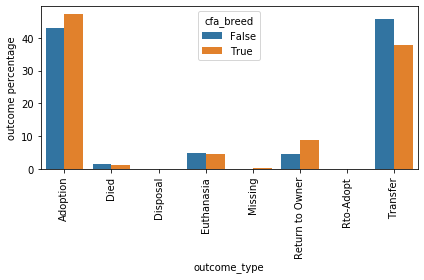

In [16]:
# graphing outcome percentages for cfa true and cfa false cats

outcome_vs_cfaBreed1 = sns.barplot(x="outcome_type",
           y = "outcome percentage",
           hue="cfa_breed",
           data = cfa_combined)
plt.xticks(rotation=90)
plt.tight_layout()

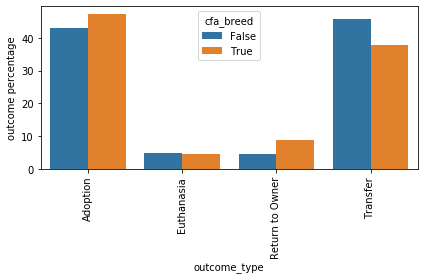

In [17]:
# since there are very few cases for outcomes of Died, Disposal, Missing, and Rto-Adopt, these are removed from the graphs

filtered_cfa_combined = cfa_combined.loc[cfa_combined['outcome_type'].isin(["Transfer", "Adoption","Return to Owner","Euthanasia"])]

outcome_vs_cfaBreed2 = sns.barplot(x="outcome_type",
           y = "outcome percentage",
           hue="cfa_breed",
           data = filtered_cfa_combined)
plt.xticks(rotation=90)
plt.tight_layout()

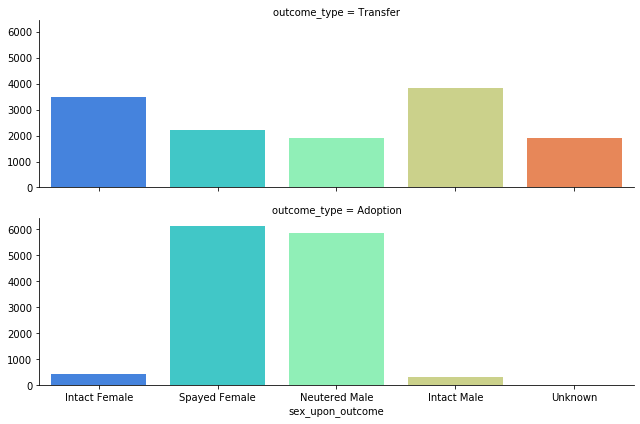

In [134]:
# looking at differences in adoption between different cat sexes 

adoption_data = df_data.loc[df_data['outcome_type'].isin(["Adoption", "Transfer"])]

g = sns.FacetGrid(adoption_data, row='outcome_type', aspect=3, height=3)
g.map(sns.countplot, 'sex_upon_outcome', palette='rainbow')


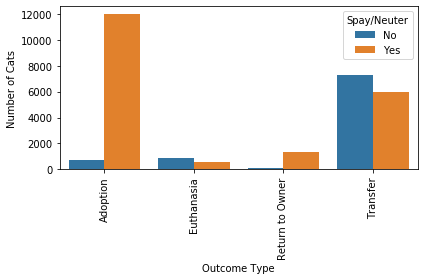

In [135]:
# effect of spay/neuter on adoption rates

spay_neuter = filtered_df_data.groupby(["outcome_type", "Spay/Neuter"])['age_upon_outcome'].count().reset_index()

spay_neuter_graph = sns.barplot(x="outcome_type",
                   y = "age_upon_outcome",
                   hue="Spay/Neuter",
                   data = spay_neuter)
spay_neuter_graph.set(xlabel="Outcome Type", ylabel = "Number of Cats")
plt.xticks(rotation=90)
plt.tight_layout()


[Text(0, 0.5, 'Number of Adoptions'), Text(0.5, 0, 'Day of Week')]

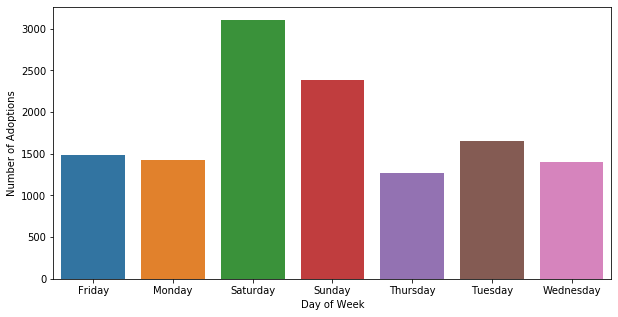

In [44]:
# looking at the top days for adoption

filter_adoption_weekday = df_data.loc[df_data['outcome_type'].isin(["Adoption"])]

plt.figure(figsize=(10,5))
adoption_day = pd.DataFrame(filter_adoption_weekday.groupby("outcome_weekday",as_index=False).count())
adoption_day_graph = sns.barplot(x = "outcome_weekday", y = "outcome_type", data = adoption_day)
adoption_day_graph.set(xlabel="Day of Week", ylabel = "Number of Adoptions")


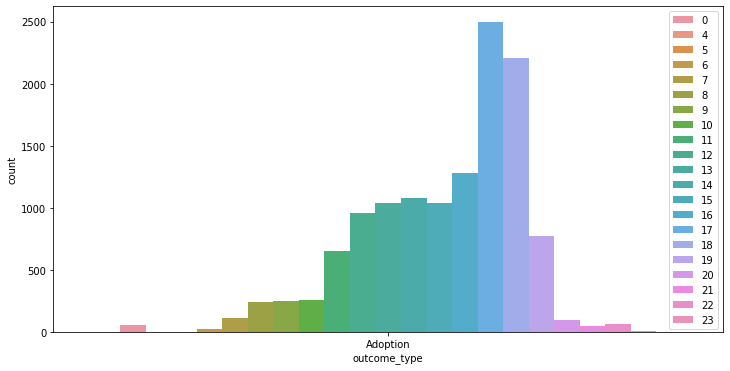

In [39]:
# looking at the top time of day for adoption
# between 5-6pm

filter_adoption_weekday = df_data.loc[df_data['outcome_type'].isin(["Adoption"])]

plt.figure(figsize=(12,6))
sns.countplot(data=filter_adoption_weekday,
              x='outcome_type',
              hue='outcome_hour')
plt.legend(loc='upper right')
plt.show()

In [52]:
# making a dataframe with only cat/kitten, outcome_type, and age_upon_outcome.count values

kitten_cat_data = filtered_df_data.groupby(["outcome_type", "Cat/Kitten (outcome)"])['age_upon_outcome'].count().reset_index()
kitten_cat_data

,outcome_type,Cat/Kitten (outcome),age_upon_outcome
0,Adoption,Cat,4048
1,Adoption,Kitten,8684
2,Euthanasia,Cat,895
3,Euthanasia,Kitten,557
4,Return to Owner,Cat,1292
5,Return to Owner,Kitten,139
6,Transfer,Cat,5632
7,Transfer,Kitten,7691


In [53]:
# creating new dataframe for only kittens and finding percentage of each outcome

kitten_outcomes = kitten_cat_data.loc[kitten_cat_data['Cat/Kitten (outcome)']=='Kitten']

kitten_outcomes.reset_index(inplace=True)
kitten_total = kitten_outcomes["age_upon_outcome"].sum()

kitten_per_outcome = []

for i in range(kitten_outcomes.shape[0]):
    kitten_per_outcome.append(round((kitten_outcomes['age_upon_outcome'][i] / kitten_total * 100),2))

kitten_outcomes['outcome percentage'] = kitten_per_outcome
kitten_outcomes

C:\Users\lnong\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,index,outcome_type,Cat/Kitten (outcome),age_upon_outcome,outcome percentage
0,1,Adoption,Kitten,8684,50.87
1,3,Euthanasia,Kitten,557,3.26
2,5,Return to Owner,Kitten,139,0.81
3,7,Transfer,Kitten,7691,45.05


In [54]:
# creating new dataframe for only cats and finding percentage of each outcome

cat_outcomes = kitten_cat_data.loc[kitten_cat_data['Cat/Kitten (outcome)']=='Cat']
cat_outcomes.reset_index(inplace=True)

cat_total = cat_outcomes["age_upon_outcome"].sum()
cat_per_outcome = []

for i in range(cat_outcomes.shape[0]):
    cat_per_outcome.append(round((cat_outcomes['age_upon_outcome'][i] / cat_total * 100),2))

cat_outcomes['outcome percentage'] = cat_per_outcome
cat_outcomes

C:\Users\lnong\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,index,outcome_type,Cat/Kitten (outcome),age_upon_outcome,outcome percentage
0,0,Adoption,Cat,4048,34.11
1,2,Euthanasia,Cat,895,7.54
2,4,Return to Owner,Cat,1292,10.89
3,6,Transfer,Cat,5632,47.46


In [55]:
kitten_cat_combined = pd.concat([kitten_outcomes, cat_outcomes], axis=0)
kitten_cat_combined

,index,outcome_type,Cat/Kitten (outcome),age_upon_outcome,outcome percentage
0,1,Adoption,Kitten,8684,50.87
1,3,Euthanasia,Kitten,557,3.26
2,5,Return to Owner,Kitten,139,0.81
3,7,Transfer,Kitten,7691,45.05
0,0,Adoption,Cat,4048,34.11
1,2,Euthanasia,Cat,895,7.54
2,4,Return to Owner,Cat,1292,10.89
3,6,Transfer,Cat,5632,47.46


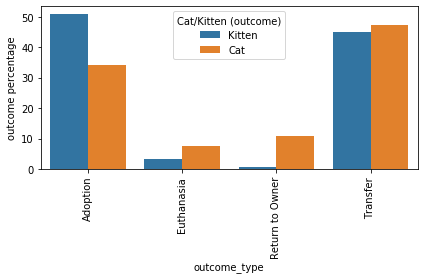

In [56]:
# kitten vs adult cat outcome differences 

outcome_vs_kittencat = sns.barplot(x="outcome_type",
           y = "outcome percentage",
           hue="Cat/Kitten (outcome)",
           data = kitten_cat_combined)
plt.xticks(rotation=90)
plt.tight_layout()

In [68]:
# seeing if coat colour/pattern affects adoption rates

# remove spaces from end of coat names for replicate values

series_coat_data = df_data['coat'].str.rstrip()
series_coat_data.unique()

array(['orange', 'blue', 'white', 'black', 'brown', 'seal', 'torbie',
       'cream', 'calico', 'chocolate', 'silver', 'flame', 'tortie',
       'lynx', 'lilac', 'buff', 'blue cream', 'silver lynx', 'gray',
       'yellow', 'apricot', 'brown tiger', 'black tiger', 'tan',
       'orange tiger', 'agouti', 'tricolor', 'sable', 'pink',
       'brown merle', 'fawn'], dtype=object)

In [77]:
# adding new column with the cleaned coat data
filtered_df_data["coat color"] = series_coat_data

C:\Users\lnong\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
# creating new dataframe with the coat colours and number of cats with that colour

coat_data = filtered_df_data.groupby(["outcome_type", "coat color"])['age_upon_outcome'].count().reset_index()
coat_data

,outcome_type,coat color,age_upon_outcome
0,Adoption,agouti,3
1,Adoption,apricot,1
2,Adoption,black,2976
3,Adoption,blue,1630
4,Adoption,blue cream,21
...,...,...,...
91,Transfer,torbie,430
92,Transfer,tortie,697
93,Transfer,tricolor,2
94,Transfer,white,757


In [76]:
# finding the top 8 coat types 

coat_data_numbers = filtered_df_data.groupby(["coat color"])['age_upon_outcome'].count().sort_values(ascending=False)
coat_data_numbers

coat color
black           6979
brown           6782
blue            3561
orange          3363
white           1680
tortie          1519
calico          1461
torbie          1023
cream            783
lynx             478
gray             374
seal             364
flame            201
silver           100
chocolate         85
lilac             83
blue cream        41
silver lynx       13
buff              11
yellow             8
brown tiger        6
agouti             6
tan                5
tricolor           3
pink               2
sable              2
fawn               1
orange tiger       1
brown merle        1
black tiger        1
apricot            1
Name: age_upon_outcome, dtype: int64

In [80]:
coat_top_8 = coat_data.loc[coat_data["coat color"].isin(["black", "brown", "blue", "orange", "white", "tortie", "calico", "torbie"])]
coat_top_8

,outcome_type,coat color,age_upon_outcome
2,Adoption,black,2976
3,Adoption,blue,1630
5,Adoption,brown,2990
7,Adoption,calico,697
15,Adoption,orange,1416
21,Adoption,torbie,512
22,Adoption,tortie,686
23,Adoption,white,717
25,Euthanasia,black,377
27,Euthanasia,blue,151


In [89]:
# black cats

black_outcomes = coat_top_8.loc[coat_top_8["coat color"]=='black']

black_outcomes.reset_index(inplace=True)
black_total = black_outcomes["age_upon_outcome"].sum()

black_per_outcome = []

for i in range(black_outcomes.shape[0]):
    black_per_outcome.append(round((black_outcomes['age_upon_outcome'][i] / black_total * 100),2))

black_outcomes['outcome percentage'] = black_per_outcome

C:\Users\lnong\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [90]:
# brown cats

brown_outcomes = coat_top_8.loc[coat_top_8["coat color"]=='brown']

brown_outcomes.reset_index(inplace=True)
brown_total = brown_outcomes["age_upon_outcome"].sum()

brown_per_outcome = []

for i in range(brown_outcomes.shape[0]):
    brown_per_outcome.append(round((brown_outcomes['age_upon_outcome'][i] / brown_total * 100),2))

brown_outcomes['outcome percentage'] = brown_per_outcome

C:\Users\lnong\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [91]:
# blue cats

blue_outcomes = coat_top_8.loc[coat_top_8["coat color"]=='blue']

blue_outcomes.reset_index(inplace=True)
blue_total = blue_outcomes["age_upon_outcome"].sum()

blue_per_outcome = []

for i in range(blue_outcomes.shape[0]):
    blue_per_outcome.append(round((blue_outcomes['age_upon_outcome'][i] / blue_total * 100),2))

blue_outcomes['outcome percentage'] = blue_per_outcome

C:\Users\lnong\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [92]:
# orange cats

orange_outcomes = coat_top_8.loc[coat_top_8["coat color"]=='orange']

orange_outcomes.reset_index(inplace=True)
orange_total = orange_outcomes["age_upon_outcome"].sum()

orange_per_outcome = []

for i in range(orange_outcomes.shape[0]):
    orange_per_outcome.append(round((orange_outcomes['age_upon_outcome'][i] / orange_total * 100),2))

orange_outcomes['outcome percentage'] = orange_per_outcome

C:\Users\lnong\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [93]:
# white cats

white_outcomes = coat_top_8.loc[coat_top_8["coat color"]=='white']

white_outcomes.reset_index(inplace=True)
white_total = white_outcomes["age_upon_outcome"].sum()

white_per_outcome = []

for i in range(white_outcomes.shape[0]):
    white_per_outcome.append(round((white_outcomes['age_upon_outcome'][i] / white_total * 100),2))

white_outcomes['outcome percentage'] = white_per_outcome

C:\Users\lnong\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [86]:
# tortie cats

tortie_outcomes = coat_top_8.loc[coat_top_8["coat color"]=='tortie']

tortie_outcomes.reset_index(inplace=True)
tortie_total = tortie_outcomes["age_upon_outcome"].sum()

tortie_per_outcome = []

for i in range(tortie_outcomes.shape[0]):
    tortie_per_outcome.append(round((tortie_outcomes['age_upon_outcome'][i] / tortie_total * 100),2))

tortie_outcomes['outcome percentage'] = tortie_per_outcome

C:\Users\lnong\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [87]:
# calico cats

calico_outcomes = coat_top_8.loc[coat_top_8["coat color"]=='calico']

calico_outcomes.reset_index(inplace=True)
calico_total = calico_outcomes["age_upon_outcome"].sum()

calico_per_outcome = []

for i in range(calico_outcomes.shape[0]):
    calico_per_outcome.append(round((calico_outcomes['age_upon_outcome'][i] / calico_total * 100),2))

calico_outcomes['outcome percentage'] = calico_per_outcome

C:\Users\lnong\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [88]:
# torbie cats

torbie_outcomes = coat_top_8.loc[coat_top_8["coat color"]=='torbie']

torbie_outcomes.reset_index(inplace=True)
torbie_total = torbie_outcomes["age_upon_outcome"].sum()

torbie_per_outcome = []

for i in range(torbie_outcomes.shape[0]):
    torbie_per_outcome.append(round((torbie_outcomes['age_upon_outcome'][i] / torbie_total * 100),2))

torbie_outcomes['outcome percentage'] = torbie_per_outcome

C:\Users\lnong\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [94]:
coat_combined = pd.concat([black_outcomes, brown_outcomes, blue_outcomes, orange_outcomes, white_outcomes, tortie_outcomes, calico_outcomes, torbie_outcomes], axis=0)
coat_combined

,index,outcome_type,coat color,age_upon_outcome,outcome percentage
0,2,Adoption,black,2976,42.64
1,25,Euthanasia,black,377,5.40
2,49,Return to Owner,black,312,4.47
3,70,Transfer,black,3314,47.49
0,5,Adoption,brown,2990,44.09
1,29,Euthanasia,brown,324,4.78
2,52,Return to Owner,brown,303,4.47
3,73,Transfer,brown,3165,46.67
0,3,Adoption,blue,1630,45.77
1,27,Euthanasia,blue,151,4.24


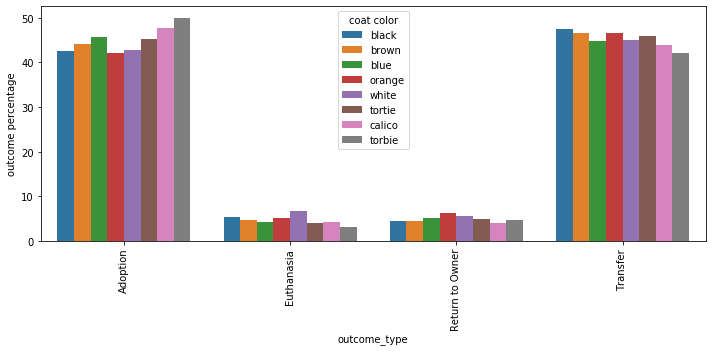

In [96]:
plt.figure(figsize=(10,5))

outcome_vs_coat = sns.barplot(x="outcome_type",
           y = "outcome percentage",
           hue="coat color",
           data = coat_combined)
plt.xticks(rotation=90)
plt.tight_layout()

In [136]:
# adoption rates for cats with a name vs without a name

# change name column to true/false for if animal has a name or not

df_data['name'].fillna("False", inplace=True)
df_data.loc[df_data['name']!="False", "name"] = "True"
df_data.head()

C:\Users\lnong\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\lnong\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,age_upon_outcome,Cat/Kitten (outcome),breed,coat,outcome_weekday,outcome_month,outcome_year,outcome_hour,name,outcome_type,sex,sex_upon_outcome,Spay/Neuter,cfa_breed
0,2 weeks,Kitten,domestic shorthair,orange,Tuesday,7,2014,16,False,Transfer,Male,Intact Male,No,False
1,1 month,Kitten,domestic shorthair,blue,Thursday,8,2014,18,True,Adoption,Female,Intact Female,No,False
2,3 months,Kitten,domestic shorthair,white,Sunday,6,2014,17,True,Adoption,Female,Spayed Female,Yes,False
3,1 year,Cat,domestic mediumhair,black,Friday,3,2014,14,True,Return to Owner,Female,Spayed Female,Yes,False
4,3 weeks,Kitten,domestic shorthair,black,Thursday,1,2014,19,False,Transfer,Male,Intact Male,No,False


In [150]:
name_data = df_data.groupby(["outcome_type", "name"])['age_upon_outcome'].count().reset_index()

# df & outcome percentage for no names
no_name_outcomes = name_data.loc[name_data["name"]== 'False']

no_name_outcomes.reset_index(inplace=True)
no_name_total = no_name_outcomes["age_upon_outcome"].sum()

no_name_per_outcome = []

for i in range(no_name_outcomes.shape[0]):
    no_name_per_outcome.append(round((no_name_outcomes['age_upon_outcome'][i] / no_name_total * 100),2))

no_name_outcomes['outcome percentage'] = no_name_per_outcome
no_name_outcomes

C:\Users\lnong\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,outcome_type,name,age_upon_outcome,outcome percentage
0,0,Adoption,False,2144,16.78
1,2,Died,False,246,1.93
2,4,Disposal,False,15,0.12
3,6,Euthanasia,False,1129,8.84
4,8,Missing,False,9,0.07
5,10,Return to Owner,False,127,0.99
6,12,Rto-Adopt,False,3,0.02
7,14,Transfer,False,9101,71.25


In [151]:
# df & outcome percentage for has names
has_name_outcomes = name_data.loc[name_data["name"]== 'True']

has_name_outcomes.reset_index(inplace=True)
has_name_total = has_name_outcomes["age_upon_outcome"].sum()

has_name_per_outcome = []

for i in range(has_name_outcomes.shape[0]):
    has_name_per_outcome.append(round((has_name_outcomes['age_upon_outcome'][i] / has_name_total * 100),2))

has_name_outcomes['outcome percentage'] = has_name_per_outcome
has_name_outcomes

C:\Users\lnong\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,index,outcome_type,name,age_upon_outcome,outcome percentage
0,1,Adoption,True,10588,63.61
1,3,Died,True,157,0.94
2,5,Disposal,True,1,0.01
3,7,Euthanasia,True,323,1.94
4,9,Missing,True,19,0.11
5,11,Return to Owner,True,1304,7.83
6,13,Rto-Adopt,True,30,0.18
7,15,Transfer,True,4222,25.37


In [154]:
names_combined = pd.concat([no_name_outcomes, has_name_outcomes])
names_combined

,index,outcome_type,name,age_upon_outcome,outcome percentage
0,0,Adoption,False,2144,16.78
1,2,Died,False,246,1.93
2,4,Disposal,False,15,0.12
3,6,Euthanasia,False,1129,8.84
4,8,Missing,False,9,0.07
5,10,Return to Owner,False,127,0.99
6,12,Rto-Adopt,False,3,0.02
7,14,Transfer,False,9101,71.25
0,1,Adoption,True,10588,63.61
1,3,Died,True,157,0.94


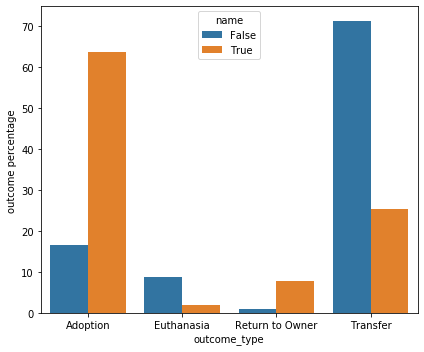

In [158]:
filtered_names = names_combined.loc[names_combined['outcome_type'].isin(["Transfer", "Adoption","Return to Owner","Euthanasia"])]

plt.figure(figsize=(6,5))

outcome_vs_name = sns.barplot(x="outcome_type",
           y = "outcome percentage",
           hue="name",
           data = filtered_names)
# plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
pwd